# packages

In [1]:
import requests
import json
import pprint
from alpaca.data.requests import CryptoBarsRequest, StockBarsRequest, StockLatestQuoteRequest, StockLatestTradeRequest, \
    StockQuotesRequest, StockTradesRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime, timedelta
from alpaca.data.historical import CryptoHistoricalDataClient, StockHistoricalDataClient
from alpaca.trading.client import TradingClient
from alpaca.trading.requests import OrderRequest,MarketOrderRequest, LimitOrderRequest, StopLimitOrderRequest, StopOrderRequest, StopLossRequest, \
    TrailingStopOrderRequest, TakeProfitRequest, GetOrdersRequest, ReplaceOrderRequest, ClosePositionRequest, GetOrderByIdRequest, \
    GetAssetsRequest, GetPortfolioHistoryRequest, CancelOrderResponse, OrderType
from alpaca.trading.enums import OrderSide, TimeInForce, QueryOrderStatus
from alpaca.data.live import CryptoDataStream, StockDataStream
from alpaca.trading.stream import TradingStream
import sys
import yaml
import pandas as pd

In [4]:
print(sys.executable)

c:\Users\User\miniforge3\envs\py310_calpha\python.exe


# info

- exchange opening hours 15:30 - 22:00

# authentication

In [2]:
keys = yaml.safe_load(open('../keys.yaml', 'r'))
paper_endpoint = 'https://paper-api.alpaca.markets/v2/account'
live_endpoint = 'https://api.alpaca.markets'

In [4]:
auth_json = {'APCA-API-KEY-ID':keys['paper_key'],
             'APCA-API-SECRET-KEY':keys['paper_secret']}

In [5]:
r = requests.get(paper_endpoint, headers = auth_json)

In [6]:
r

<Response [200]>

In [7]:
json.loads(r.text)

{'id': '065b51ba-07a3-4c75-978d-a2a120e66fd7',
 'admin_configurations': {},
 'user_configurations': None,
 'account_number': 'PA34M5MYDJVU',
 'status': 'ACTIVE',
 'crypto_status': 'ACTIVE',
 'options_approved_level': 2,
 'options_trading_level': 2,
 'currency': 'USD',
 'buying_power': '20000',
 'regt_buying_power': '20000',
 'daytrading_buying_power': '0',
 'effective_buying_power': '20000',
 'non_marginable_buying_power': '10000',
 'options_buying_power': '10000',
 'bod_dtbp': '0',
 'cash': '10000',
 'accrued_fees': '0',
 'pending_transfer_in': '0',
 'portfolio_value': '10000',
 'pattern_day_trader': False,
 'trading_blocked': False,
 'transfers_blocked': False,
 'account_blocked': False,
 'created_at': '2024-03-23T16:16:29.615779Z',
 'trade_suspended_by_user': False,
 'multiplier': '2',
 'shorting_enabled': True,
 'equity': '10000',
 'last_equity': '10000',
 'long_market_value': '0',
 'short_market_value': '0',
 'position_market_value': '0',
 'initial_margin': '0',
 'maintenance_marg

In [3]:
trading_client = TradingClient(keys['paper_key'], keys['paper_secret'], paper=True)
trading_client.get_account()
# trading_client.get_account_configurations()
# trading_client.get_all_assets()
# trading_client.get_all_positions()
# trading_client.get_asset()
# trading_client.get_calendar()
# trading_client.get_clock()
# trading_client.get_corporate_announcement_by_id()
# trading_client.get_corporate_announcements()
# trading_client.get_open_position()
# trading_client.get_order_by_id()
# trading_client.get_orders()


{   'account_blocked': False,
    'account_number': 'PA3XXAN76N36',
    'accrued_fees': '0',
    'buying_power': '30834.03',
    'cash': '11915.87',
    'created_at': datetime.datetime(2024, 4, 25, 11, 29, 49, 245398, tzinfo=TzInfo(UTC)),
    'crypto_status': <AccountStatus.ACTIVE: 'ACTIVE'>,
    'currency': 'USD',
    'daytrade_count': 0,
    'daytrading_buying_power': '0',
    'equity': '20150.41',
    'id': UUID('a0912f9a-4ed1-4f8c-86ab-a6aebdb5ad7a'),
    'initial_margin': '4733.4',
    'last_equity': '20088.30189430716',
    'last_maintenance_margin': '2996.94',
    'long_market_value': '8234.54',
    'maintenance_margin': '3332.94',
    'multiplier': '2',
    'non_marginable_buying_power': '13417.01',
    'pattern_day_trader': False,
    'pending_transfer_in': '0',
    'pending_transfer_out': None,
    'portfolio_value': '20150.41',
    'regt_buying_power': '30834.03',
    'short_market_value': '0',
    'shorting_enabled': True,
    'sma': '19201.36',
    'status': <AccountStatus

## activities - transactions

In [23]:
# https://docs.alpaca.markets/reference/getaccountactivitiesbyactivitytype-1
# https://docs.alpaca.markets/docs/account-activities

url = "https://paper-api.alpaca.markets/v2/account/activities/TRANS"

headers = {
    "accept": "application/json",
    "APCA-API-KEY-ID": keys['paper_key'],
    "APCA-API-SECRET-KEY": keys['paper_secret']
}

response = requests.get(url, headers=headers)
response.json()

[]

In [21]:
trading_client.get_account()

{   'account_blocked': False,
    'account_number': 'PA34M5MYDJVU',
    'accrued_fees': '0',
    'buying_power': '152.68',
    'cash': '76.34',
    'created_at': datetime.datetime(2024, 3, 23, 16, 16, 29, 615779, tzinfo=TzInfo(UTC)),
    'crypto_status': <AccountStatus.ACTIVE: 'ACTIVE'>,
    'currency': 'USD',
    'daytrade_count': 0,
    'daytrading_buying_power': '0',
    'equity': '9890.86',
    'id': UUID('065b51ba-07a3-4c75-978d-a2a120e66fd7'),
    'initial_margin': '0',
    'last_equity': '10000',
    'last_maintenance_margin': '0',
    'long_market_value': '9814.52',
    'maintenance_margin': '0',
    'multiplier': '2',
    'non_marginable_buying_power': '76.34',
    'pattern_day_trader': False,
    'pending_transfer_in': '0',
    'pending_transfer_out': None,
    'portfolio_value': '9890.86',
    'regt_buying_power': '152.68',
    'short_market_value': '0',
    'shorting_enabled': True,
    'sma': '0',
    'status': <AccountStatus.ACTIVE: 'ACTIVE'>,
    'trade_suspended_by_user

In [20]:
trading_client.get_orders()

[{   'asset_class': <AssetClass.CRYPTO: 'crypto'>,
     'asset_id': UUID('faf30512-0c0d-4ff8-a7a0-169c747d1e9c'),
     'canceled_at': None,
     'client_order_id': '43c70738-ff4b-492b-8c7d-cebc9a74f3d9',
     'created_at': datetime.datetime(2024, 3, 23, 16, 53, 6, 437402, tzinfo=TzInfo(UTC)),
     'expired_at': None,
     'extended_hours': False,
     'failed_at': None,
     'filled_at': None,
     'filled_avg_price': None,
     'filled_qty': '0',
     'hwm': None,
     'id': UUID('5040dbd7-5909-4372-a17a-60ea303e4fba'),
     'legs': None,
     'limit_price': None,
     'notional': '76',
     'order_class': <OrderClass.SIMPLE: 'simple'>,
     'order_type': <OrderType.MARKET: 'market'>,
     'qty': None,
     'replaced_at': None,
     'replaced_by': None,
     'replaces': None,
     'side': <OrderSide.BUY: 'buy'>,
     'status': <OrderStatus.NEW: 'new'>,
     'stop_price': None,
     'submitted_at': datetime.datetime(2024, 3, 23, 16, 53, 6, 436071, tzinfo=TzInfo(UTC)),
     'symbol': 'L

In [14]:
trading_client.cancel_order_by_id('132984a8-32f0-4539-a5da-5b98c3983702')

# get crypto historical bars

In [9]:
client = CryptoHistoricalDataClient()

# Creating request object
request_params = CryptoBarsRequest(
                        symbol_or_symbols=["BTC/USD"],
                        timeframe=TimeFrame.Day,
                        start=datetime(2022, 9, 1),
                        end=datetime.now()
                        )

In [10]:
request_params

{   'currency': None,
    'end': datetime.datetime(2023, 12, 4, 20, 19, 12, 690577),
    'limit': None,
    'sort': None,
    'start': datetime.datetime(2022, 9, 1, 0, 0),
    'symbol_or_symbols': ['BTC/USD'],
    'timeframe': <alpaca.data.timeframe.TimeFrame object at 0x000002248D86F190>}

In [11]:
# Retrieve daily bars for Bitcoin in a DataFrame and printing it
btc_bars = client.get_crypto_bars(request_params)

# Convert to dataframe
btc_bars.df

open        high        low  \
symbol  timestamp                                                        
BTC/USD 2022-09-01 05:00:00+00:00  20055.790000  20292.0000  19564.860   
        2022-09-02 05:00:00+00:00  20156.760000  20444.0000  19757.720   
        2022-09-03 05:00:00+00:00  19924.830000  19968.2000  19658.040   
        2022-09-04 05:00:00+00:00  19805.390000  20058.0000  19587.860   
        2022-09-05 05:00:00+00:00  19888.670000  20180.5000  19635.960   
...                                         ...         ...        ...   
        2023-11-30 06:00:00+00:00  37894.065000  38251.5645  37514.590   
        2023-12-01 06:00:00+00:00  38116.281500  39002.9160  38082.745   
        2023-12-02 06:00:00+00:00  38756.324000  39716.2565  38707.700   
        2023-12-03 06:00:00+00:00  39430.860000  41541.7160  39396.544   
        2023-12-04 06:00:00+00:00  41520.945142  42158.6220  41176.005   

                                          close       volume  trade_count  \
symbol  timestamp                                                           
BTC/USD 2022-09-01 05:00:00+00:00  20156.760000  7141.975485     110122.0   
        2022-09-02 05:00:00+00:00  19919.470000  7165.911879      96231.0   
        2022-09-03 05:00:00+00:00  19806.110000  2677.652012      51551.0   
        2022-09-04 05:00:00+00:00  19888.670000  4325.678790      62082.0   
        2022-09-05 05:00:00+00:00  19760.560000  6274.552824      84784.0   
...                                         ...          ...          ...   
        2023-11-30 06:00:00+00:00  38153.885000     1.359182         87.0   
        2023-12-01 06:00:00+00:00  38768.416500     3.718735        145.0   
        2023-12-02 06:00:00+00:00  39434.945000     0.847861         68.0   
        2023-12-03 06:00:00+00:00  41522.473000     2.341953        207.0   
        2023-12-04 06:00:00+00:00  41853.462774     4.133438        260.0   

                                           vwap  
symbol  timestamp                                
BTC/USD 2022-09-01 05:00:00+00:00  19934.167845  
        2022-09-02 05:00:00+00:00  20075.200868  
        2022-09-03 05:00:00+00:00  19800.185480  
        2022-09-04 05:00:00+00:00  19834.451414  
        2022-09-05 05:00:00+00:00  19812.095982  
...                                         ...  
        2023-11-30 06:00:00+00:00  37738.317027  
        2023-12-01 06:00:00+00:00  38625.148002  
        2023-12-02 06:00:00+00:00  39234.610904  
        2023-12-03 06:00:00+00:00  39942.086204  
        2023-12-04 06:00:00+00:00  41542.107516  

[460 rows x 7 columns]

<Axes: xlabel='symbol,timestamp'>

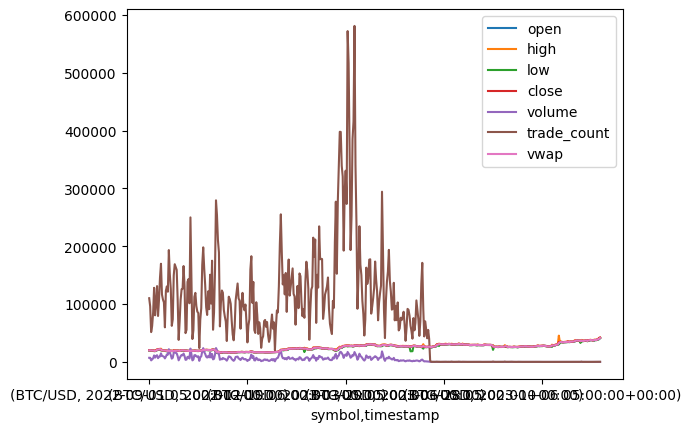

In [12]:
btc_bars.df.plot()

In [13]:
help(CryptoBarsRequest)

Help on class CryptoBarsRequest in module alpaca.data.requests:

class CryptoBarsRequest(BaseBarsRequest)
 |  CryptoBarsRequest(*, symbol_or_symbols: Union[str, List[str]], start: Optional[datetime.datetime] = None, end: Optional[datetime.datetime] = None, limit: Optional[int] = None, currency: Optional[alpaca.common.enums.SupportedCurrencies] = None, sort: Optional[alpaca.common.enums.Sort] = None, timeframe: alpaca.data.timeframe.TimeFrame) -> None
 |  
 |  The request model for retrieving bar data for cryptocurrencies.
 |  
 |  See BaseBarsRequest for more information on available parameters.
 |  
 |  Attributes:
 |      symbol_or_symbols (Union[str, List[str]]): The ticker identifier or list of ticker identifiers.
 |      start (Optional[datetime]): The beginning of the time interval for desired data. Timezone naive inputs assumed to be in UTC.
 |      end (Optional[datetime]): The end of the time interval for desired data. Defaults to now. Timezone naive inputs assumed to be in UT

# get stock historical bars - day

In [9]:
stock_client = StockHistoricalDataClient(keys['paper_key'], keys['paper_secret'])

In [4]:
request_params = StockBarsRequest(
    symbol_or_symbols=["MSFT"],
    timeframe=TimeFrame.Day,
    start=datetime(2022, 9, 1),
    end= datetime.today().date()#datetime.now()
)

In [5]:
stock_bars = stock_client.get_stock_bars(request_params=request_params)
stock_bars.df

open    high     low   close      volume  \
symbol timestamp                                                                
MSFT   2022-09-01 04:00:00+00:00  258.870  260.89  255.41  260.40  26127281.0   
       2022-09-02 04:00:00+00:00  261.695  264.74  254.47  256.06  26192064.0   
       2022-09-06 04:00:00+00:00  256.200  257.83  251.94  253.25  23801954.0   
       2022-09-07 04:00:00+00:00  254.700  258.83  253.22  258.09  27762263.0   
       2022-09-08 04:00:00+00:00  257.510  260.43  254.79  258.52  23625347.0   
...                                   ...     ...     ...     ...         ...   
       2024-03-04 05:00:00+00:00  413.440  417.35  412.32  414.92  17595956.0   
       2024-03-05 05:00:00+00:00  413.960  414.25  400.64  402.65  26923077.0   
       2024-03-06 05:00:00+00:00  402.970  405.16  398.39  402.09  22344149.0   
       2024-03-07 05:00:00+00:00  406.120  409.78  402.24  409.14  18718479.0   
       2024-03-08 05:00:00+00:00  407.960  410.42  404.33  406.22  17981065.0   

                                  trade_count        vwap  
symbol timestamp                                           
MSFT   2022-09-01 04:00:00+00:00     332386.0  258.471093  
       2022-09-02 04:00:00+00:00     307873.0  258.541050  
       2022-09-06 04:00:00+00:00     295719.0  254.134807  
       2022-09-07 04:00:00+00:00     259250.0  256.871803  
       2022-09-08 04:00:00+00:00     256508.0  257.786511  
...                                       ...         ...  
       2024-03-04 05:00:00+00:00     397492.0  415.133115  
       2024-03-05 05:00:00+00:00     538264.0  403.929173  
       2024-03-06 05:00:00+00:00     449330.0  402.228118  
       2024-03-07 05:00:00+00:00     356886.0  407.638384  
       2024-03-08 05:00:00+00:00     371405.0  407.108610  

[381 rows x 7 columns]

# get stock history - hourly

In [13]:
request_params = StockBarsRequest(
    symbol_or_symbols=["MSFT"],
    timeframe=TimeFrame.Hour,
    start=datetime(2022, 9, 1),
    end= datetime.now() - timedelta(hours=2)
)
stock_bars = stock_client.get_stock_bars(request_params=request_params)
stock_bars.df

open     high     low   close  \
symbol timestamp                                                      
MSFT   2022-09-01 08:00:00+00:00  258.8900  259.670  258.56  259.15   
       2022-09-01 09:00:00+00:00  259.1400  259.250  258.11  259.05   
       2022-09-01 10:00:00+00:00  259.2900  259.790  259.21  259.79   
       2022-09-01 11:00:00+00:00  259.5500  260.200  259.49  259.57   
       2022-09-01 12:00:00+00:00  259.5239  260.817  258.40  258.50   
...                                    ...      ...     ...     ...   
       2024-03-11 10:00:00+00:00  403.4200  404.020  403.24  403.97   
       2024-03-11 11:00:00+00:00  404.1600  405.220  404.00  404.20   
       2024-03-11 12:00:00+00:00  405.0400  406.940  403.20  403.70   
       2024-03-11 13:00:00+00:00  403.9800  404.500  401.75  401.95   
       2024-03-11 14:00:00+00:00  401.9650  404.590  401.26  403.82   

                                     volume  trade_count        vwap  
symbol timestamp                                                      
MSFT   2022-09-01 08:00:00+00:00     6904.0        247.0  259.021437  
       2022-09-01 09:00:00+00:00     5932.0        196.0  258.741465  
       2022-09-01 10:00:00+00:00     4288.0        105.0  259.484620  
       2022-09-01 11:00:00+00:00    76129.0       1120.0  259.763000  
       2022-09-01 12:00:00+00:00   422473.0       2479.0  261.030234  
...                                     ...          ...         ...  
       2024-03-11 10:00:00+00:00    10806.0        306.0  403.577090  
       2024-03-11 11:00:00+00:00    24412.0        842.0  404.731874  
       2024-03-11 12:00:00+00:00    60536.0       2240.0  404.142627  
       2024-03-11 13:00:00+00:00  2389446.0      50308.0  403.114045  
       2024-03-11 14:00:00+00:00  2272304.0      80346.0  402.796214  

[6040 rows x 7 columns]

# get stock last quote

In [18]:
multisymbol_request_params = StockLatestQuoteRequest(symbol_or_symbols=["SPY", "GLD", "TLT"])

latest_multisymbol_quotes = stock_client.get_stock_latest_quote(multisymbol_request_params)

In [19]:
latest_multisymbol_quotes

{'SPY': {   'ask_exchange': 'V',
     'ask_price': 455.93,
     'ask_size': 1.0,
     'bid_exchange': 'V',
     'bid_price': 455.92,
     'bid_size': 5.0,
     'conditions': ['R'],
     'symbol': 'SPY',
     'tape': 'B',
     'timestamp': datetime.datetime(2023, 12, 4, 19, 19, 30, 908297, tzinfo=TzInfo(UTC))},
 'TLT': {   'ask_exchange': 'V',
     'ask_price': 92.31,
     'ask_size': 10.0,
     'bid_exchange': 'V',
     'bid_price': 92.3,
     'bid_size': 9.0,
     'conditions': ['R'],
     'symbol': 'TLT',
     'tape': 'C',
     'timestamp': datetime.datetime(2023, 12, 4, 19, 19, 29, 802427, tzinfo=TzInfo(UTC))},
 'GLD': {   'ask_exchange': 'V',
     'ask_price': 187.64,
     'ask_size': 1.0,
     'bid_exchange': 'V',
     'bid_price': 187.63,
     'bid_size': 1.0,
     'conditions': ['R'],
     'symbol': 'GLD',
     'tape': 'B',
     'timestamp': datetime.datetime(2023, 12, 4, 19, 19, 30, 497488, tzinfo=TzInfo(UTC))}}

# get stock quotes

In [20]:
request_params = StockQuotesRequest(symbol_or_symbols=["AAPL"],
                                    start=datetime(2022, 11, 30, 18, 1, 0),
                                    end= datetime(2023, 12, 1, 21, 59, 0),
                                    limit = 100)
stock_quotes = stock_client.get_stock_quotes(request_params)

In [21]:
stock_quotes.data

{'AAPL': [{   'ask_exchange': 'K',
      'ask_price': 141.25,
      'ask_size': 4.0,
      'bid_exchange': 'K',
      'bid_price': 141.24,
      'bid_size': 1.0,
      'conditions': ['R'],
      'symbol': 'AAPL',
      'tape': 'C',
      'timestamp': datetime.datetime(2022, 11, 30, 18, 1, 0, 195609, tzinfo=TzInfo(UTC))},
  {   'ask_exchange': 'K',
      'ask_price': 141.25,
      'ask_size': 4.0,
      'bid_exchange': 'Z',
      'bid_price': 141.24,
      'bid_size': 2.0,
      'conditions': ['R'],
      'symbol': 'AAPL',
      'tape': 'C',
      'timestamp': datetime.datetime(2022, 11, 30, 18, 1, 0, 204403, tzinfo=TzInfo(UTC))},
  {   'ask_exchange': 'K',
      'ask_price': 141.25,
      'ask_size': 3.0,
      'bid_exchange': 'Z',
      'bid_price': 141.24,
      'bid_size': 2.0,
      'conditions': ['R'],
      'symbol': 'AAPL',
      'tape': 'C',
      'timestamp': datetime.datetime(2022, 11, 30, 18, 1, 0, 205194, tzinfo=TzInfo(UTC))},
  {   'ask_exchange': 'N',
      'ask_price': 1

In [22]:
help(StockQuotesRequest)

Help on class StockQuotesRequest in module alpaca.data.requests:

class StockQuotesRequest(BaseTimeseriesDataRequest)
 |  StockQuotesRequest(*, symbol_or_symbols: Union[str, List[str]], start: Optional[datetime.datetime] = None, end: Optional[datetime.datetime] = None, limit: Optional[int] = None, currency: Optional[alpaca.common.enums.SupportedCurrencies] = None, sort: Optional[alpaca.common.enums.Sort] = None, feed: Optional[alpaca.data.enums.DataFeed] = None) -> None
 |  
 |  This request class is used to submit a request for stock quote data.
 |  
 |  See BaseTimeseriesDataRequest for more information on available parameters.
 |  
 |  Attributes:
 |      symbol_or_symbols (Union[str, List[str]]): The ticker identifier or list of ticker identifiers.
 |      start (Optional[datetime]): The beginning of the time interval for desired data. Timezone naive inputs assumed to be in UTC.
 |      end (Optional[datetime]): The end of the time interval for desired data. Defaults to now. Timezo

# get stock last trade

In [20]:
multisymbol_request_params = StockLatestQuoteRequest(symbol_or_symbols=["MSFT", "GLD", "TLT"])
stock_last_trade = stock_client.get_stock_latest_trade(multisymbol_request_params)

In [21]:
stock_last_trade

{'TLT': {   'conditions': ['@'],
     'exchange': 'V',
     'id': 832,
     'price': 95.68,
     'size': 100.0,
     'symbol': 'TLT',
     'tape': 'C',
     'timestamp': datetime.datetime(2024, 3, 11, 15, 39, 6, 584501, tzinfo=TzInfo(UTC))},
 'GLD': {   'conditions': [' '],
     'exchange': 'V',
     'id': 54323976818754,
     'price': 202.295,
     'size': 100.0,
     'symbol': 'GLD',
     'tape': 'B',
     'timestamp': datetime.datetime(2024, 3, 11, 15, 37, 38, 60577, tzinfo=TzInfo(UTC))},
 'MSFT': {   'conditions': ['@'],
     'exchange': 'V',
     'id': 2514,
     'price': 402.585,
     'size': 215.0,
     'symbol': 'MSFT',
     'tape': 'C',
     'timestamp': datetime.datetime(2024, 3, 11, 15, 38, 3, 29739, tzinfo=TzInfo(UTC))}}

# get trades

In [25]:
request_params = StockTradesRequest(symbol_or_symbols=["AAPL"],
                                    start=datetime(2022, 11, 30, 18, 1, 0),
                                    end= datetime(2023, 12, 1, 21, 59, 0),
                                    limit = 100)
stock_trades = stock_client.get_stock_quotes(request_params)

In [26]:
stock_trades.data

{'AAPL': [{   'ask_exchange': 'K',
      'ask_price': 141.25,
      'ask_size': 4.0,
      'bid_exchange': 'K',
      'bid_price': 141.24,
      'bid_size': 1.0,
      'conditions': ['R'],
      'symbol': 'AAPL',
      'tape': 'C',
      'timestamp': datetime.datetime(2022, 11, 30, 18, 1, 0, 195609, tzinfo=TzInfo(UTC))},
  {   'ask_exchange': 'K',
      'ask_price': 141.25,
      'ask_size': 4.0,
      'bid_exchange': 'Z',
      'bid_price': 141.24,
      'bid_size': 2.0,
      'conditions': ['R'],
      'symbol': 'AAPL',
      'tape': 'C',
      'timestamp': datetime.datetime(2022, 11, 30, 18, 1, 0, 204403, tzinfo=TzInfo(UTC))},
  {   'ask_exchange': 'K',
      'ask_price': 141.25,
      'ask_size': 3.0,
      'bid_exchange': 'Z',
      'bid_price': 141.24,
      'bid_size': 2.0,
      'conditions': ['R'],
      'symbol': 'AAPL',
      'tape': 'C',
      'timestamp': datetime.datetime(2022, 11, 30, 18, 1, 0, 205194, tzinfo=TzInfo(UTC))},
  {   'ask_exchange': 'N',
      'ask_price': 1

# orders

In [23]:
trading_client = TradingClient(keys['paper_key'], keys['paper_secret'], paper=True)

In [4]:
account = trading_client.get_account()

In [5]:
account

{   'account_blocked': False,
    'account_number': 'PA35W524QQMD',
    'accrued_fees': '0',
    'buying_power': '200000',
    'cash': '100000',
    'created_at': datetime.datetime(2024, 3, 10, 18, 41, 51, 565644, tzinfo=TzInfo(UTC)),
    'crypto_status': <AccountStatus.ACTIVE: 'ACTIVE'>,
    'currency': 'USD',
    'daytrade_count': 0,
    'daytrading_buying_power': '0',
    'equity': '100000',
    'id': UUID('c8c4029f-b035-40a0-ab51-1659ccdf8f98'),
    'initial_margin': '0',
    'last_equity': '100000',
    'last_maintenance_margin': '0',
    'long_market_value': '0',
    'maintenance_margin': '0',
    'multiplier': '2',
    'non_marginable_buying_power': '100000',
    'pattern_day_trader': False,
    'pending_transfer_in': '0',
    'pending_transfer_out': None,
    'portfolio_value': '100000',
    'regt_buying_power': '200000',
    'short_market_value': '0',
    'shorting_enabled': True,
    'sma': '0',
    'status': <AccountStatus.ACTIVE: 'ACTIVE'>,
    'trade_suspended_by_user': Fa

## market order

### buy

In [13]:
# preparing orders
market_order_data = MarketOrderRequest(
    symbol="DELL",
    qty=5,
    side=OrderSide.BUY,
    time_in_force=TimeInForce.DAY
)



In [14]:
# Market order
market_order = trading_client.submit_order(
    order_data=market_order_data
)

### sell

In [8]:
# preparing orders
market_order_data = MarketOrderRequest(
    symbol="SPY",
    qty=2,
    side=OrderSide.SELL,
    time_in_force=TimeInForce.DAY
)



In [9]:
# Market order
market_order = trading_client.submit_order(
    order_data=market_order_data
)

## limit order

In [32]:
limit_order_data = LimitOrderRequest(
    symbol="BTC/USD",
    limit_price=39600,
    notional=1000,
    side=OrderSide.BUY,
    time_in_force=TimeInForce.GTC
)

# Limit order
limit_order = trading_client.submit_order(
    order_data=limit_order_data
)

## stop order & stop limit (stop loss) order

In [34]:
stop_order_data = StopOrderRequest(
    symbol="DELL",
    qty=1,
    stop_price = 71,
    side=OrderSide.BUY,
    time_in_force=TimeInForce.DAY
)

# Limit order
limit_order = trading_client.submit_order(
    order_data=stop_order_data
)

In [33]:
help(StopOrderRequest)

Help on class StopOrderRequest in module alpaca.trading.requests:

class StopOrderRequest(OrderRequest)
 |  StopOrderRequest(*, symbol: str, qty: Optional[float] = None, notional: Optional[float] = None, side: alpaca.trading.enums.OrderSide, type: alpaca.trading.enums.OrderType, time_in_force: alpaca.trading.enums.TimeInForce, order_class: Optional[alpaca.trading.enums.OrderClass] = None, extended_hours: Optional[bool] = None, client_order_id: Optional[str] = None, take_profit: Optional[alpaca.trading.requests.TakeProfitRequest] = None, stop_loss: Optional[alpaca.trading.requests.StopLossRequest] = None, stop_price: float) -> None
 |  
 |  Used to submit a stop order.
 |  
 |  Attributes:
 |      symbol (str): The symbol identifier for the asset being traded
 |      qty (Optional[float]): The number of shares to trade. Fractional qty for stocks only with market orders.
 |      notional (Optional[float]): The base currency value of the shares to trade. For stocks, only works with Market

## stop limit orders

In [36]:
# buy
stop_limit_order_data = StopLimitOrderRequest(
    symbol="SPY",
    qty=1,
    stop_price = 460,
    limit_price = 462,
    side=OrderSide.BUY,
    time_in_force=TimeInForce.DAY
)

# Limit order
limit_order = trading_client.submit_order(
    order_data=stop_limit_order_data
)

In [37]:
# sell
stop_limit_order_data = StopLimitOrderRequest(
    symbol="SPY",
    qty=1,
    stop_price = 454,
    limit_price = 452,
    side=OrderSide.SELL,
    time_in_force=TimeInForce.DAY
)

# Limit order
limit_order = trading_client.submit_order(
    order_data=stop_limit_order_data
)

In [35]:
help(StopLimitOrderRequest)

Help on class StopLimitOrderRequest in module alpaca.trading.requests:

class StopLimitOrderRequest(OrderRequest)
 |  StopLimitOrderRequest(*, symbol: str, qty: Optional[float] = None, notional: Optional[float] = None, side: alpaca.trading.enums.OrderSide, type: alpaca.trading.enums.OrderType, time_in_force: alpaca.trading.enums.TimeInForce, order_class: Optional[alpaca.trading.enums.OrderClass] = None, extended_hours: Optional[bool] = None, client_order_id: Optional[str] = None, take_profit: Optional[alpaca.trading.requests.TakeProfitRequest] = None, stop_loss: Optional[alpaca.trading.requests.StopLossRequest] = None, stop_price: float, limit_price: float) -> None
 |  
 |  Used to submit a stop limit order.
 |  
 |  Attributes:
 |      symbol (str): The symbol identifier for the asset being traded
 |      qty (Optional[float]): The number of shares to trade. Fractional qty for stocks only with market orders.
 |      notional (Optional[float]): The base currency value of the shares to 

## trailing stop orders

In [12]:
stop_limit_order_data = TrailingStopOrderRequest(
    symbol="TSCO",
    qty=5,
    type = OrderType.MARKET,
    side=OrderSide.BUY,
    time_in_force=TimeInForce.DAY,
    trail_price = 10
    #, trail_percent = 0.02
)

# Limit order
limit_order = trading_client.submit_order(
    order_data=stop_limit_order_data
)

In [21]:
stop_limit_order_data = TrailingStopOrderRequest(
    symbol="TSCO",
    qty=3,
    #type = OrderType.TRAILING_STOP,
    side=OrderSide.BUY,
    time_in_force=TimeInForce.DAY,
    trail_price = 10
    #, trail_percent = 0.02
)

# Limit order
limit_order = trading_client.submit_order(
    order_data=stop_limit_order_data
)

In [46]:
help(TrailingStopOrderRequest)

Help on class TrailingStopOrderRequest in module alpaca.trading.requests:

class TrailingStopOrderRequest(OrderRequest)
 |  TrailingStopOrderRequest(*, symbol: str, qty: Optional[float] = None, notional: Optional[float] = None, side: alpaca.trading.enums.OrderSide, type: alpaca.trading.enums.OrderType, time_in_force: alpaca.trading.enums.TimeInForce, order_class: Optional[alpaca.trading.enums.OrderClass] = None, extended_hours: Optional[bool] = None, client_order_id: Optional[str] = None, take_profit: Optional[alpaca.trading.requests.TakeProfitRequest] = None, stop_loss: Optional[alpaca.trading.requests.StopLossRequest] = None, trail_price: Optional[float] = None, trail_percent: Optional[float] = None) -> None
 |  
 |  Used to submit a trailing stop order.
 |  
 |  Attributes:
 |      symbol (str): The symbol identifier for the asset being traded
 |      qty (Optional[float]): The number of shares to trade. Fractional qty for stocks only with market orders.
 |      notional (Optional[f

## take profit orders

In [ ]:
#TODO
stop_limit_order_data = TakeProfitRequest(
    symbol="SPY",
    qty=1,
    stop_price = 454,
    limit_price = 452,
    side=OrderSide.SELL,
    time_in_force=TimeInForce.DAY
)

# Limit order
limit_order = trading_client.submit_order(
    order_data=stop_limit_order_data
)

In [48]:
help(TakeProfitRequest)

Help on class TakeProfitRequest in module alpaca.trading.requests:

class TakeProfitRequest(alpaca.common.requests.NonEmptyRequest)
 |  TakeProfitRequest(*, limit_price: float) -> None
 |  
 |  Used for providing take profit details for a bracket order.
 |  
 |  Attributes:
 |      limit_price (float): The execution price for exiting a profitable trade.
 |  
 |  Method resolution order:
 |      TakeProfitRequest
 |      alpaca.common.requests.NonEmptyRequest
 |      alpaca.common.models.ValidateBaseModel
 |      pydantic.main.BaseModel
 |      builtins.object
 |  
 |  Data and other attributes defined here:
 |  
 |  __abstractmethods__ = frozenset()
 |  
 |  __annotations__ = {'limit_price': <class 'float'>}
 |  
 |  __class_vars__ = set()
 |  
 |  __private_attributes__ = {}
 |  
 |  __pydantic_complete__ = True
 |  
 |  __pydantic_core_schema__ = {'cls': <class 'alpaca.trading.requests.Tak...
 |  
 |  __pydantic_custom_init__ = False
 |  
 |  __pydantic_decorators__ = DecoratorInfos(

## bracket orders (combines stop loss + take profit)

In [17]:
#TODO - order placed
market_order_data = MarketOrderRequest(
    symbol="AAPL",
    qty=2,
    side=OrderSide.BUY,
    time_in_force=TimeInForce.DAY,
    take_profit = TakeProfitRequest(limit_price = 200),
    stop_loss = StopLossRequest(stop_price = 185)
)

market_order = trading_client.submit_order(
    order_data=market_order_data
)


### dell test

In [8]:
market_order_data = MarketOrderRequest(
    symbol="DELL",
    ##qty=2,
    notional=300,
    side=OrderSide.BUY,
    time_in_force=TimeInForce.DAY,
    stop_loss = StopLossRequest(stop_price = 100)
)

market_order = trading_client.submit_order(
    order_data=market_order_data
)

### nvda test

In [9]:
market_order_data = MarketOrderRequest(
    symbol="NVDA",
    #qty=2,
    notional=1003,
    side=OrderSide.BUY,
    time_in_force=TimeInForce.DAY,
    stop_loss = StopLossRequest(stop_price = 850)
)

market_order = trading_client.submit_order(
    order_data=market_order_data
)

### aapl test

In [10]:
market_order_data = MarketOrderRequest(
    symbol="AAPL",
    #qty=2,
    notional=500,
    side=OrderSide.BUY,
    time_in_force=TimeInForce.DAY,
    stop_loss = StopLossRequest(stop_price = 165)
)

market_order = trading_client.submit_order(
    order_data=market_order_data
)

In [11]:
market_order

{   'asset_class': <AssetClass.US_EQUITY: 'us_equity'>,
    'asset_id': UUID('b0b6dd9d-8b9b-48a9-ba46-b9d54906e415'),
    'canceled_at': None,
    'client_order_id': '62b8b1e3-2436-4f98-ae35-195b8dc2143b',
    'created_at': datetime.datetime(2024, 3, 10, 18, 59, 54, 913705, tzinfo=TzInfo(UTC)),
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'hwm': None,
    'id': UUID('145607d7-3ee6-4916-9f34-a9f6412011d7'),
    'legs': None,
    'limit_price': None,
    'notional': '500',
    'order_class': <OrderClass.SIMPLE: 'simple'>,
    'order_type': <OrderType.MARKET: 'market'>,
    'qty': None,
    'replaced_at': None,
    'replaced_by': None,
    'replaces': None,
    'side': <OrderSide.BUY: 'buy'>,
    'status': <OrderStatus.ACCEPTED: 'accepted'>,
    'stop_price': None,
    'submitted_at': datetime.datetime(2024, 3, 10, 18, 59, 54, 913192, tzinfo=TzInfo(UTC)),
    'symbol': 'AAPL',
  

### msft test

In [13]:
market_order_data = MarketOrderRequest(
    symbol="MSFT",
    #qty=2,
    notional=800,
    side=OrderSide.BUY,
    time_in_force=TimeInForce.DAY,
    stop_loss = StopLossRequest(stop_price = 400)
)

market_order = trading_client.submit_order(
    order_data=market_order_data
)
market_order

{   'asset_class': <AssetClass.US_EQUITY: 'us_equity'>,
    'asset_id': UUID('b6d1aa75-5c9c-4353-a305-9e2caa1925ab'),
    'canceled_at': None,
    'client_order_id': '16944a1f-4889-4860-aae0-42d0169e51a2',
    'created_at': datetime.datetime(2024, 3, 10, 19, 16, 12, 894322, tzinfo=TzInfo(UTC)),
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'hwm': None,
    'id': UUID('1c3cf955-cd51-4401-9c83-8ac3ce32acd1'),
    'legs': None,
    'limit_price': None,
    'notional': '800',
    'order_class': <OrderClass.SIMPLE: 'simple'>,
    'order_type': <OrderType.MARKET: 'market'>,
    'qty': None,
    'replaced_at': None,
    'replaced_by': None,
    'replaces': None,
    'side': <OrderSide.BUY: 'buy'>,
    'status': <OrderStatus.ACCEPTED: 'accepted'>,
    'stop_price': None,
    'submitted_at': datetime.datetime(2024, 3, 10, 19, 16, 12, 893708, tzinfo=TzInfo(UTC)),
    'symbol': 'MSFT',
  

### getting their info

#### all open

In [14]:
# params to filter orders by
request_params = GetOrdersRequest(
    status=QueryOrderStatus.OPEN#, side=OrderSide.SELL
)

# orders that satisfy params
orders = trading_client.get_orders(filter=request_params)
orders

[{   'asset_class': <AssetClass.US_EQUITY: 'us_equity'>,
     'asset_id': UUID('b6d1aa75-5c9c-4353-a305-9e2caa1925ab'),
     'canceled_at': None,
     'client_order_id': '16944a1f-4889-4860-aae0-42d0169e51a2',
     'created_at': datetime.datetime(2024, 3, 10, 19, 16, 12, 894322, tzinfo=TzInfo(UTC)),
     'expired_at': None,
     'extended_hours': False,
     'failed_at': None,
     'filled_at': None,
     'filled_avg_price': None,
     'filled_qty': '0',
     'hwm': None,
     'id': UUID('1c3cf955-cd51-4401-9c83-8ac3ce32acd1'),
     'legs': None,
     'limit_price': None,
     'notional': '800',
     'order_class': <OrderClass.SIMPLE: 'simple'>,
     'order_type': <OrderType.MARKET: 'market'>,
     'qty': None,
     'replaced_at': None,
     'replaced_by': None,
     'replaces': None,
     'side': <OrderSide.BUY: 'buy'>,
     'status': <OrderStatus.ACCEPTED: 'accepted'>,
     'stop_price': None,
     'submitted_at': datetime.datetime(2024, 3, 10, 19, 16, 12, 893708, tzinfo=TzInfo(UTC))

#### specific order

In [22]:
request_params = GetOrderByIdRequest(
    nested = True
)

# orders that satisfy params
order = trading_client.get_order_by_id(order_id = '791ec7be-04e5-4bf1-a456-3b10db8586a6', # DELL
                                       filter=request_params)
order

{   'asset_class': <AssetClass.US_EQUITY: 'us_equity'>,
    'asset_id': UUID('91ee1b57-f36c-40cf-a8b7-84583daaafc9'),
    'canceled_at': None,
    'client_order_id': '2c730e9e-9382-4568-a585-79fbab78a8cb',
    'created_at': datetime.datetime(2024, 3, 10, 18, 57, 18, 370693, tzinfo=TzInfo(UTC)),
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'hwm': None,
    'id': UUID('791ec7be-04e5-4bf1-a456-3b10db8586a6'),
    'legs': None,
    'limit_price': None,
    'notional': '300',
    'order_class': <OrderClass.SIMPLE: 'simple'>,
    'order_type': <OrderType.MARKET: 'market'>,
    'qty': None,
    'replaced_at': None,
    'replaced_by': None,
    'replaces': None,
    'side': <OrderSide.BUY: 'buy'>,
    'status': <OrderStatus.ACCEPTED: 'accepted'>,
    'stop_price': None,
    'submitted_at': datetime.datetime(2024, 3, 10, 18, 57, 18, 370200, tzinfo=TzInfo(UTC)),
    'symbol': 'DELL',
  

### specific symbol

In [27]:
# params to filter orders by
request_params = GetOrdersRequest(
    symbols = ['SPOT'],
    status=QueryOrderStatus.ALL
)

# orders that satisfy params
orders = trading_client.get_orders(filter=request_params)
orders

[{   'asset_class': <AssetClass.US_EQUITY: 'us_equity'>,
     'asset_id': UUID('39a26dc1-927a-4590-b103-b8068a013e7f'),
     'canceled_at': None,
     'client_order_id': 'a4526d8a-9d58-4e0c-895b-9b562f0946a4',
     'created_at': datetime.datetime(2024, 3, 11, 16, 3, 19, 601086, tzinfo=TzInfo(UTC)),
     'expired_at': None,
     'extended_hours': False,
     'failed_at': None,
     'filled_at': datetime.datetime(2024, 3, 11, 16, 3, 20, 220570, tzinfo=TzInfo(UTC)),
     'filled_avg_price': '256.94',
     'filled_qty': '8.6',
     'hwm': None,
     'id': UUID('4b4db32f-6538-4c86-a47c-9a577db00fe6'),
     'legs': None,
     'limit_price': None,
     'notional': None,
     'order_class': <OrderClass.SIMPLE: 'simple'>,
     'order_type': <OrderType.MARKET: 'market'>,
     'qty': '8.6',
     'replaced_at': None,
     'replaced_by': None,
     'replaces': None,
     'side': <OrderSide.SELL: 'sell'>,
     'status': <OrderStatus.FILLED: 'filled'>,
     'stop_price': None,
     'submitted_at': da

### correct bracket orders

### tsla test

#### market order

In [24]:
market_order_data = MarketOrderRequest(
    symbol="TSLA",
    qty=2.5,
    side=OrderSide.BUY,
    time_in_force=TimeInForce.DAY)

market_order = trading_client.submit_order(
    order_data=market_order_data
)

In [26]:
market_order

{   'asset_class': <AssetClass.US_EQUITY: 'us_equity'>,
    'asset_id': UUID('8ccae427-5dd0-45b3-b5fe-7ba5e422c766'),
    'canceled_at': None,
    'client_order_id': '5631504e-8085-4f64-be7c-bb9dbb9d8ebe',
    'created_at': datetime.datetime(2024, 3, 10, 21, 8, 9, 574574, tzinfo=TzInfo(UTC)),
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'hwm': None,
    'id': UUID('d3233225-9b10-4ac1-b3e9-388a655e65b3'),
    'legs': None,
    'limit_price': None,
    'notional': None,
    'order_class': <OrderClass.SIMPLE: 'simple'>,
    'order_type': <OrderType.MARKET: 'market'>,
    'qty': '2.5',
    'replaced_at': None,
    'replaced_by': None,
    'replaces': None,
    'side': <OrderSide.BUY: 'buy'>,
    'status': <OrderStatus.ACCEPTED: 'accepted'>,
    'stop_price': None,
    'submitted_at': datetime.datetime(2024, 3, 10, 21, 8, 9, 574013, tzinfo=TzInfo(UTC)),
    'symbol': 'TSLA',
    't

#### stop order (to trigger stoploss)

In [30]:
stop_order_data = StopOrderRequest(
    symbol="TSLA",
    qty=7.5,
    side=OrderSide.SELL,
    time_in_force=TimeInForce.GTC,
    stop_price = 170
)

stop_order = trading_client.submit_order(
    order_data=stop_order_data
)
stop_order # fractional orders might be only time in force DAY, and must be SIMPLE orders

APIError: {"code":42210000,"message":"fractional orders must be DAY orders"}

### spot

In [35]:
params = OrderRequest(symbol = 'SPOT',
    qty = 8,
    side = 'buy',
    time_in_force = 'day',
    type = 'market',
    order_class = 'oto',
    stop_loss = {'stop_price':255})

trading_client.submit_order(params)

{   'asset_class': <AssetClass.US_EQUITY: 'us_equity'>,
    'asset_id': UUID('39a26dc1-927a-4590-b103-b8068a013e7f'),
    'canceled_at': None,
    'client_order_id': '08b6de50-1302-4a55-83c7-754755267006',
    'created_at': datetime.datetime(2024, 3, 10, 22, 13, 42, 209969, tzinfo=TzInfo(UTC)),
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'hwm': None,
    'id': UUID('c45c979a-3b1f-44c7-b5f4-ec176553b343'),
    'legs': [   {   'asset_class': <AssetClass.US_EQUITY: 'us_equity'>,
                    'asset_id': UUID('39a26dc1-927a-4590-b103-b8068a013e7f'),
                    'canceled_at': None,
                    'client_order_id': '2d0248d2-077a-4930-851b-2b50f9189ce8',
                    'created_at': datetime.datetime(2024, 3, 10, 22, 13, 42, 210000, tzinfo=TzInfo(UTC)),
                    'expired_at': None,
                    'extended_hours': False,
                  

### netflix

In [36]:
params = OrderRequest(symbol = 'NFLX',
    qty = 8,
    side = 'buy',
    time_in_force = 'gtc',
    type = 'market',
    order_class = 'oto',
    stop_loss = {'stop_price':600})

trading_client.submit_order(params)

{   'asset_class': <AssetClass.US_EQUITY: 'us_equity'>,
    'asset_id': UUID('bb2a26c0-4c77-4801-8afc-82e8142ac7b8'),
    'canceled_at': None,
    'client_order_id': 'c0003408-6f01-4ed1-b3f6-b0c02d730341',
    'created_at': datetime.datetime(2024, 3, 10, 22, 17, 51, 452438, tzinfo=TzInfo(UTC)),
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'hwm': None,
    'id': UUID('b9e55a2c-a3bf-48de-9903-31906d3bbb0c'),
    'legs': [   {   'asset_class': <AssetClass.US_EQUITY: 'us_equity'>,
                    'asset_id': UUID('bb2a26c0-4c77-4801-8afc-82e8142ac7b8'),
                    'canceled_at': None,
                    'client_order_id': '8486f0e2-76c4-4d75-bae8-26c59ef9a5e8',
                    'created_at': datetime.datetime(2024, 3, 10, 22, 17, 51, 452469, tzinfo=TzInfo(UTC)),
                    'expired_at': None,
                    'extended_hours': False,
                  

## trailing stop loss & take profit orders

In [3]:
#TODO stuff

## extracting list of orders

In [39]:
# params to filter orders by
request_params = GetOrdersRequest(
    status=QueryOrderStatus.OPEN#, side=OrderSide.SELL
)

# orders that satisfy params
orders = trading_client.get_orders(filter=request_params)

In [40]:
orders

[{   'asset_class': <AssetClass.US_EQUITY: 'us_equity'>,
     'asset_id': UUID('b28f4066-5c6d-479b-a2af-85dc1a8f16fb'),
     'canceled_at': None,
     'client_order_id': '16fcdadb-53e0-4012-a250-cdbba30f0f72',
     'created_at': datetime.datetime(2023, 12, 4, 20, 55, 43, 102176, tzinfo=TzInfo(UTC)),
     'expired_at': None,
     'extended_hours': False,
     'failed_at': None,
     'filled_at': None,
     'filled_avg_price': None,
     'filled_qty': '0',
     'hwm': None,
     'id': UUID('ec3ad75a-a0db-418f-a891-865c8826ae9f'),
     'legs': None,
     'limit_price': '452',
     'notional': None,
     'order_class': <OrderClass.SIMPLE: 'simple'>,
     'order_type': <OrderType.STOP_LIMIT: 'stop_limit'>,
     'qty': '1',
     'replaced_at': None,
     'replaced_by': None,
     'replaces': None,
     'side': <OrderSide.SELL: 'sell'>,
     'status': <OrderStatus.NEW: 'new'>,
     'stop_price': '454',
     'submitted_at': datetime.datetime(2023, 12, 4, 20, 55, 43, 107726, tzinfo=TzInfo(UTC))

In [41]:
len(orders)

4

### filled orders

In [49]:
# params to filter orders by
request_params = GetOrdersRequest(
    status='closed', #QueryOrderStatus.CLOSED,
    symbols=['NVDA']
)

# orders that satisfy params
orders = trading_client.get_orders(filter=request_params)
dict(orders[0])

{'id': UUID('b4807926-8def-4b4a-a5f1-801e8c696590'),
 'client_order_id': 'cc1c8b52-4742-45ea-8908-3cb776f33ba3',
 'created_at': datetime.datetime(2024, 3, 11, 15, 49, 42, 414171, tzinfo=TzInfo(UTC)),
 'updated_at': datetime.datetime(2024, 3, 11, 15, 49, 43, 880325, tzinfo=TzInfo(UTC)),
 'submitted_at': datetime.datetime(2024, 3, 11, 15, 49, 42, 421014, tzinfo=TzInfo(UTC)),
 'filled_at': datetime.datetime(2024, 3, 11, 15, 49, 43, 877024, tzinfo=TzInfo(UTC)),
 'expired_at': None,
 'canceled_at': None,
 'failed_at': None,
 'replaced_at': None,
 'replaced_by': None,
 'replaces': None,
 'asset_id': UUID('4ce9353c-66d1-46c2-898f-fce867ab0247'),
 'symbol': 'NVDA',
 'asset_class': <AssetClass.US_EQUITY: 'us_equity'>,
 'notional': None,
 'qty': '6.4',
 'filled_qty': '6.4',
 'filled_avg_price': '873.010313',
 'order_class': <OrderClass.SIMPLE: 'simple'>,
 'order_type': <OrderType.MARKET: 'market'>,
 'type': <OrderType.MARKET: 'market'>,
 'side': <OrderSide.BUY: 'buy'>,
 'time_in_force': <TimeInF

In [73]:
orders_dicts = map(dict, orders)
keys_to_keep = ['symbol', 'filled_at', 'filled_qty', 'side']
filtered_orders = [{key: value for key, value in d.items() if key in keys_to_keep} for d in orders_dicts]
df_orders = pd.DataFrame(filtered_orders)
df_orders['side'] = df_orders['side'].apply(str)
df_orders.sort_values(by = 'filled_at', inplace = True)
df_orders[['filled_qty_lag', 'side_lag']] = df_orders[['filled_qty', 'side']].shift(1)
df_orders

,filled_at,symbol,filled_qty,side,filled_qty_lag,side_lag
4,2024-03-11 13:30:01.190784+00:00,NVDA,1.160879629,OrderSide.BUY,None,None
3,2024-03-11 15:43:40.318116+00:00,NVDA,1.160879629,OrderSide.SELL,1.160879629,OrderSide.BUY
2,2024-03-11 15:44:03.714508+00:00,NVDA,5.5,OrderSide.BUY,1.160879629,OrderSide.SELL
1,2024-03-11 15:48:29.276113+00:00,NVDA,5.5,OrderSide.SELL,5.5,OrderSide.BUY
0,2024-03-11 15:49:43.877024+00:00,NVDA,6.4,OrderSide.BUY,5.5,OrderSide.SELL


In [74]:
len(df_orders.loc[(df_orders['side'] == 'OrderSide.SELL') &
                  (df_orders['side_lag'] == 'OrderSide.BUY') &
                  (df_orders['filled_qty'] == df_orders['filled_qty_lag']),:])

2

## deleting & cancelling orders

## replacing & modifying orders

## cancel order by id

In [44]:
trading_client.cancel_order_by_id('a0c36286-43cf-4cdd-ae6c-a875279b1575') # UUID

# positions

## get all positions

In [24]:
trading_client.get_all_positions()

[{   'asset_class': <AssetClass.US_EQUITY: 'us_equity'>,
     'asset_id': UUID('b0b6dd9d-8b9b-48a9-ba46-b9d54906e415'),
     'asset_marginable': True,
     'avg_entry_price': '173.04',
     'avg_entry_swap_rate': None,
     'change_today': '0.0133526620980496',
     'cost_basis': '1799.616',
     'current_price': '173.0097',
     'exchange': <AssetExchange.NASDAQ: 'NASDAQ'>,
     'lastday_price': '170.73',
     'market_value': '1799.30088',
     'qty': '10.4',
     'qty_available': '10.4',
     'side': <PositionSide.LONG: 'long'>,
     'swap_rate': None,
     'symbol': 'AAPL',
     'unrealized_intraday_pl': '-0.31512',
     'unrealized_intraday_plpc': '-0.0001751040221914',
     'unrealized_pl': '-0.31512',
     'unrealized_plpc': '-0.0001751040221914',
     'usd': None},
 {   'asset_class': <AssetClass.US_EQUITY: 'us_equity'>,
     'asset_id': UUID('91ee1b57-f36c-40cf-a8b7-84583daaafc9'),
     'asset_marginable': True,
     'avg_entry_price': '115.81',
     'avg_entry_swap_rate': None

## close position

In [25]:
close_position = trading_client.close_position('39a26dc1-927a-4590-b103-b8068a013e7f')
close_position

{   'asset_class': <AssetClass.US_EQUITY: 'us_equity'>,
    'asset_id': UUID('39a26dc1-927a-4590-b103-b8068a013e7f'),
    'canceled_at': None,
    'client_order_id': 'a4526d8a-9d58-4e0c-895b-9b562f0946a4',
    'created_at': datetime.datetime(2024, 3, 11, 16, 3, 19, 601086, tzinfo=TzInfo(UTC)),
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'hwm': None,
    'id': UUID('4b4db32f-6538-4c86-a47c-9a577db00fe6'),
    'legs': None,
    'limit_price': None,
    'notional': None,
    'order_class': <OrderClass.SIMPLE: 'simple'>,
    'order_type': <OrderType.MARKET: 'market'>,
    'qty': '8.6',
    'replaced_at': None,
    'replaced_by': None,
    'replaces': None,
    'side': <OrderSide.SELL: 'sell'>,
    'status': <OrderStatus.PENDING_NEW: 'pending_new'>,
    'stop_price': None,
    'submitted_at': datetime.datetime(2024, 3, 11, 16, 3, 19, 600681, tzinfo=TzInfo(UTC)),
    'symbol': 'SPO

## close position partially - sell/buy just part quantity

# streaming market data

In [3]:
stock_stream = StockDataStream(paper_key, paper_secret )

In [4]:
# async handler
async def quote_data_handler(data):
    # quote data will arrive here
    print(data)

stock_stream.subscribe_quotes(quote_data_handler, "SPY")

stock_stream.run()

AttributeError: 'NoneType' object has no attribute 'is_running'

In [5]:
crypto_stream = CryptoDataStream(paper_key, paper_secret)

In [6]:
# async handler
async def quote_data_handler(data):
    # quote data will arrive here
    print(data)

crypto_stream.subscribe_quotes(quote_data_handler, "BTC/USD")

crypto_stream.run()

AttributeError: 'NoneType' object has no attribute 'is_running'

In [12]:
help(CryptoDataStream)

Help on class CryptoDataStream in module alpaca.data.live.crypto:

class CryptoDataStream(alpaca.common.websocket.BaseStream)
 |  CryptoDataStream(api_key: str, secret_key: str, raw_data: bool = False, feed: alpaca.data.enums.CryptoFeed = <CryptoFeed.US: 'us'>, url_override: Optional[str] = None, websocket_params: Optional[Dict] = None) -> None
 |  
 |  A WebSocket client for streaming live crypto data.
 |  
 |  See BaseStream for more information on implementation and the methods available.
 |  
 |  Method resolution order:
 |      CryptoDataStream
 |      alpaca.common.websocket.BaseStream
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, api_key: str, secret_key: str, raw_data: bool = False, feed: alpaca.data.enums.CryptoFeed = <CryptoFeed.US: 'us'>, url_override: Optional[str] = None, websocket_params: Optional[Dict] = None) -> None
 |      Instantiates a WebSocket client for accessing live cryptocurrency data.
 |      
 |      Args:
 |          api_key

In [5]:
#TODO test